In [1]:
#imgaug 0.2.6 
import imgaug
imgaug.__version__

'0.2.6'

In [2]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [3]:
# import tensorflow as tf
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
# print(tf.reduce_sum(tf.random.normal([1000, 1000])))

In [6]:
!nvidia-smi

Mon Feb 15 16:12:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 460.27.04    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro K2200        Off  | 00000000:03:00.0 Off |                  N/A |
| 42%   39C    P0     1W /  39W |    125MiB /  4041MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
from vesicle import NucleusConfig, train, NucleusDataset
from mrcnn import model as modellib

Using TensorFlow backend.


In [8]:
# Directory to save logs and trained model
ROOT_DIR = os.path.abspath("")
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")
dataset_dir = '/allen/programs/braintv/workgroups/neuralcoding/Parastoo/'
print(DEFAULT_LOGS_DIR)

/allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs



## Configurations

In [9]:
# load ves_dataset
config = NucleusConfig()
dataset = NucleusDataset()
dataset.load_nucleus(dataset_dir, "threeD_train")
# dataset.load_nucleus(dataset_dir, "train250")
# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 385
Classes: ['BG', 'vesicles', 'mitochondria']


363


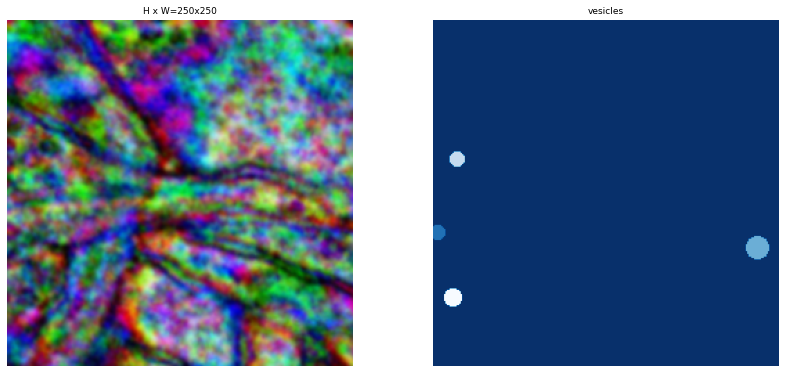

183


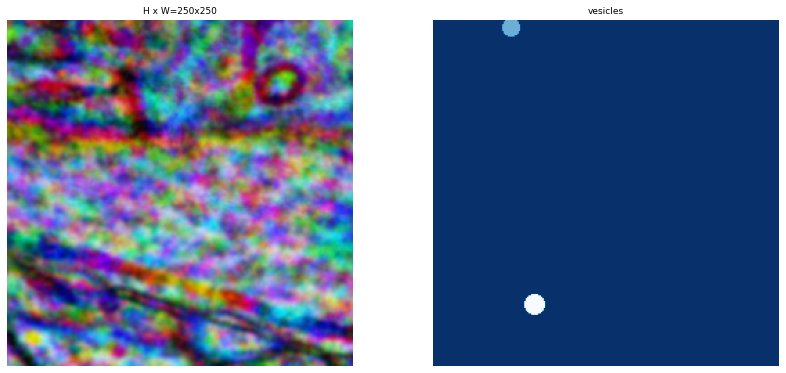

273


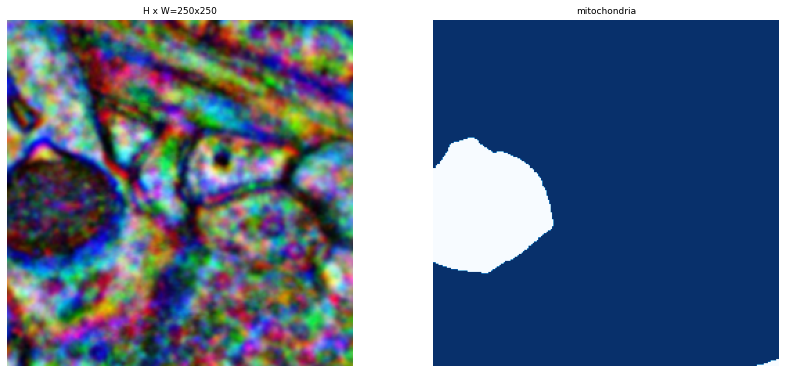

86


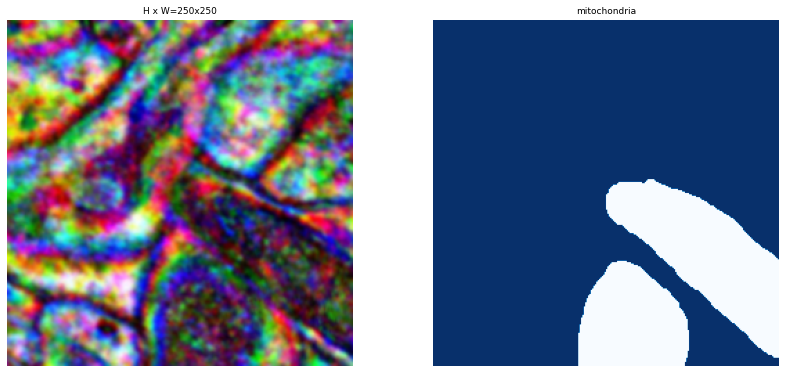

In [10]:
import numpy as np
from mrcnn import visualize
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)

for image_id in image_ids:
    
    print(image_id)
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names, limit=1)

In [10]:
model = modellib.MaskRCNN(mode="training", config=config, model_dir=DEFAULT_LOGS_DIR)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [12]:
# model = modellib.MaskRCNN(mode="training", config=config, model_dir=DEFAULT_LOGS_DIR)
# weights_path = model.get_imagenet_weights()
# vesicle20210203T2254

In [15]:
weights_path = '/allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs/vesicle20210215T1012/mask_rcnn_vesicle_0100.h5'

In [16]:
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs/vesicle20210215T1012/mask_rcnn_vesicle_0100.h5
Re-starting from epoch 100


In [17]:
DEFAULT_LOGS_DIR

'/allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs'

In [18]:
dataset_dir = '/allen/programs/braintv/workgroups/neuralcoding/Parastoo/'
train(model, dataset_dir, "threeD_train", config)

Train network heads

Starting at epoch 100. LR=0.001

Checkpoint Path: /allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs/vesicle20210215T1012/mask_rcnn_vesicle_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_

/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Train all layers

Starting at epoch 100. LR=0.001

Checkpoint Path: /allen/programs/braintv/workgroups/neuralcoding/Parastoo/Mask_RCNN/samples/vesicles/logs/vesicle20210215T1012/mask_rcnn_vesicle_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Co

/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/keras/engine/trai

Epoch 101/300
149/150 [============================>.] - ETA: 1s - loss: 0.5375 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.1360 - mrcnn_class_loss: 0.1082 - mrcnn_bbox_loss: 0.0645 - mrcnn_mask_loss: 0.2076

/pipeline/anaconda/envs/tf3/lib/python3.6/site-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



150/150 [==============================] - 242s 2s/step - loss: 0.5377 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.1355 - mrcnn_class_loss: 0.1084 - mrcnn_bbox_loss: 0.0648 - mrcnn_mask_loss: 0.2079 - val_loss: 1.2465 - val_rpn_class_loss: 0.0600 - val_rpn_bbox_loss: 0.4712 - val_mrcnn_class_loss: 0.1976 - val_mrcnn_bbox_loss: 0.2091 - val_mrcnn_mask_loss: 0.3085
Epoch 102/300
150/150 [==============================] - 172s 1s/step - loss: 0.5123 - rpn_class_loss: 0.0208 - rpn_bbox_loss: 0.1014 - mrcnn_class_loss: 0.1129 - mrcnn_bbox_loss: 0.0620 - mrcnn_mask_loss: 0.2151 - val_loss: 1.1658 - val_rpn_class_loss: 0.0512 - val_rpn_bbox_loss: 0.4111 - val_mrcnn_class_loss: 0.2452 - val_mrcnn_bbox_loss: 0.1677 - val_mrcnn_mask_loss: 0.2905
Epoch 103/300
150/150 [==============================] - 171s 1s/step - loss: 0.5704 - rpn_class_loss: 0.0209 - rpn_bbox_loss: 0.1182 - mrcnn_class_loss: 0.1266 - mrcnn_bbox_loss: 0.0747 - mrcnn_mask_loss: 0.2300 - val_loss: 1.2214 - val_rpn_class_loss:

150/150 [==============================] - 171s 1s/step - loss: 0.6956 - rpn_class_loss: 0.0349 - rpn_bbox_loss: 0.1753 - mrcnn_class_loss: 0.1526 - mrcnn_bbox_loss: 0.0953 - mrcnn_mask_loss: 0.2374 - val_loss: 1.3034 - val_rpn_class_loss: 0.0740 - val_rpn_bbox_loss: 0.3774 - val_mrcnn_class_loss: 0.3428 - val_mrcnn_bbox_loss: 0.2041 - val_mrcnn_mask_loss: 0.3052
Epoch 123/300
150/150 [==============================] - 172s 1s/step - loss: 0.7149 - rpn_class_loss: 0.0355 - rpn_bbox_loss: 0.2228 - mrcnn_class_loss: 0.1472 - mrcnn_bbox_loss: 0.0809 - mrcnn_mask_loss: 0.2285 - val_loss: 1.2052 - val_rpn_class_loss: 0.0603 - val_rpn_bbox_loss: 0.3573 - val_mrcnn_class_loss: 0.2949 - val_mrcnn_bbox_loss: 0.2132 - val_mrcnn_mask_loss: 0.2795
Epoch 124/300
150/150 [==============================] - 171s 1s/step - loss: 0.4975 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.1094 - mrcnn_class_loss: 0.0994 - mrcnn_bbox_loss: 0.0577 - mrcnn_mask_loss: 0.2091 - val_loss: 1.0729 - val_rpn_class_loss: 

Epoch 144/300
150/150 [==============================] - 171s 1s/step - loss: 0.6902 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.2023 - mrcnn_class_loss: 0.1493 - mrcnn_bbox_loss: 0.0795 - mrcnn_mask_loss: 0.2264 - val_loss: 0.8929 - val_rpn_class_loss: 0.0170 - val_rpn_bbox_loss: 0.3071 - val_mrcnn_class_loss: 0.1213 - val_mrcnn_bbox_loss: 0.1728 - val_mrcnn_mask_loss: 0.2747
Epoch 145/300
150/150 [==============================] - 172s 1s/step - loss: 0.6428 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.2134 - mrcnn_class_loss: 0.1234 - mrcnn_bbox_loss: 0.0844 - mrcnn_mask_loss: 0.2037 - val_loss: 1.1381 - val_rpn_class_loss: 0.0453 - val_rpn_bbox_loss: 0.3875 - val_mrcnn_class_loss: 0.2328 - val_mrcnn_bbox_loss: 0.1719 - val_mrcnn_mask_loss: 0.3006
Epoch 146/300
150/150 [==============================] - 171s 1s/step - loss: 0.8654 - rpn_class_loss: 0.0390 - rpn_bbox_loss: 0.2914 - mrcnn_class_loss: 0.1937 - mrcnn_bbox_loss: 0.1097 - mrcnn_mask_loss: 0.2316 - val_loss: 1.0635 - val_rp

Epoch 166/300
150/150 [==============================] - 173s 1s/step - loss: 0.6489 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.1765 - mrcnn_class_loss: 0.1342 - mrcnn_bbox_loss: 0.0835 - mrcnn_mask_loss: 0.2233 - val_loss: 1.1219 - val_rpn_class_loss: 0.0537 - val_rpn_bbox_loss: 0.3961 - val_mrcnn_class_loss: 0.2336 - val_mrcnn_bbox_loss: 0.1616 - val_mrcnn_mask_loss: 0.2768
Epoch 167/300
150/150 [==============================] - 175s 1s/step - loss: 0.4884 - rpn_class_loss: 0.0131 - rpn_bbox_loss: 0.1213 - mrcnn_class_loss: 0.1006 - mrcnn_bbox_loss: 0.0634 - mrcnn_mask_loss: 0.1900 - val_loss: 0.8719 - val_rpn_class_loss: 0.0197 - val_rpn_bbox_loss: 0.3059 - val_mrcnn_class_loss: 0.1475 - val_mrcnn_bbox_loss: 0.1318 - val_mrcnn_mask_loss: 0.2670
Epoch 168/300
150/150 [==============================] - 171s 1s/step - loss: 0.4864 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 0.1224 - mrcnn_class_loss: 0.0970 - mrcnn_bbox_loss: 0.0625 - mrcnn_mask_loss: 0.1859 - val_loss: 1.0542 - val_rp

Epoch 188/300
150/150 [==============================] - 171s 1s/step - loss: 0.7168 - rpn_class_loss: 0.0357 - rpn_bbox_loss: 0.2061 - mrcnn_class_loss: 0.1625 - mrcnn_bbox_loss: 0.0919 - mrcnn_mask_loss: 0.2206 - val_loss: 1.2294 - val_rpn_class_loss: 0.0628 - val_rpn_bbox_loss: 0.3990 - val_mrcnn_class_loss: 0.2543 - val_mrcnn_bbox_loss: 0.2027 - val_mrcnn_mask_loss: 0.3106
Epoch 189/300
150/150 [==============================] - 171s 1s/step - loss: 0.6512 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.1943 - mrcnn_class_loss: 0.1375 - mrcnn_bbox_loss: 0.0787 - mrcnn_mask_loss: 0.2104 - val_loss: 1.1910 - val_rpn_class_loss: 0.0588 - val_rpn_bbox_loss: 0.2921 - val_mrcnn_class_loss: 0.3326 - val_mrcnn_bbox_loss: 0.1914 - val_mrcnn_mask_loss: 0.3159
Epoch 190/300
150/150 [==============================] - 171s 1s/step - loss: 0.7380 - rpn_class_loss: 0.0355 - rpn_bbox_loss: 0.2253 - mrcnn_class_loss: 0.1632 - mrcnn_bbox_loss: 0.0901 - mrcnn_mask_loss: 0.2239 - val_loss: 0.9721 - val_rp

Epoch 210/300
150/150 [==============================] - 171s 1s/step - loss: 0.5670 - rpn_class_loss: 0.0164 - rpn_bbox_loss: 0.1729 - mrcnn_class_loss: 0.1130 - mrcnn_bbox_loss: 0.0696 - mrcnn_mask_loss: 0.1951 - val_loss: 0.8995 - val_rpn_class_loss: 0.0089 - val_rpn_bbox_loss: 0.2487 - val_mrcnn_class_loss: 0.2148 - val_mrcnn_bbox_loss: 0.1475 - val_mrcnn_mask_loss: 0.2796
Epoch 211/300
150/150 [==============================] - 171s 1s/step - loss: 0.4815 - rpn_class_loss: 0.0184 - rpn_bbox_loss: 0.1273 - mrcnn_class_loss: 0.1004 - mrcnn_bbox_loss: 0.0545 - mrcnn_mask_loss: 0.1809 - val_loss: 0.9514 - val_rpn_class_loss: 0.0230 - val_rpn_bbox_loss: 0.2318 - val_mrcnn_class_loss: 0.2794 - val_mrcnn_bbox_loss: 0.1400 - val_mrcnn_mask_loss: 0.2772
Epoch 212/300
150/150 [==============================] - 171s 1s/step - loss: 0.6024 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.1931 - mrcnn_class_loss: 0.1171 - mrcnn_bbox_loss: 0.0683 - mrcnn_mask_loss: 0.1965 - val_loss: 1.0865 - val_rp

Epoch 232/300
150/150 [==============================] - 171s 1s/step - loss: 0.3344 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0346 - mrcnn_mask_loss: 0.1545 - val_loss: 1.0911 - val_rpn_class_loss: 0.0640 - val_rpn_bbox_loss: 0.2875 - val_mrcnn_class_loss: 0.2556 - val_mrcnn_bbox_loss: 0.1537 - val_mrcnn_mask_loss: 0.3304
Epoch 233/300
150/150 [==============================] - 171s 1s/step - loss: 0.5600 - rpn_class_loss: 0.0225 - rpn_bbox_loss: 0.1748 - mrcnn_class_loss: 0.1137 - mrcnn_bbox_loss: 0.0608 - mrcnn_mask_loss: 0.1883 - val_loss: 1.0852 - val_rpn_class_loss: 0.0284 - val_rpn_bbox_loss: 0.3572 - val_mrcnn_class_loss: 0.2189 - val_mrcnn_bbox_loss: 0.1734 - val_mrcnn_mask_loss: 0.3073
Epoch 234/300
150/150 [==============================] - 171s 1s/step - loss: 0.6103 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.1820 - mrcnn_class_loss: 0.1315 - mrcnn_bbox_loss: 0.0696 - mrcnn_mask_loss: 0.1976 - val_loss: 0.9965 - val_rp

Epoch 254/300
150/150 [==============================] - 172s 1s/step - loss: 0.4056 - rpn_class_loss: 0.0134 - rpn_bbox_loss: 0.1103 - mrcnn_class_loss: 0.0706 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.1675 - val_loss: 1.4251 - val_rpn_class_loss: 0.1390 - val_rpn_bbox_loss: 0.3341 - val_mrcnn_class_loss: 0.3976 - val_mrcnn_bbox_loss: 0.1586 - val_mrcnn_mask_loss: 0.3958
Epoch 255/300
150/150 [==============================] - 172s 1s/step - loss: 0.4510 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.1226 - mrcnn_class_loss: 0.0972 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.1692 - val_loss: 0.9520 - val_rpn_class_loss: 0.0250 - val_rpn_bbox_loss: 0.3291 - val_mrcnn_class_loss: 0.1551 - val_mrcnn_bbox_loss: 0.1521 - val_mrcnn_mask_loss: 0.2906
Epoch 256/300
150/150 [==============================] - 171s 1s/step - loss: 0.7109 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.2256 - mrcnn_class_loss: 0.1548 - mrcnn_bbox_loss: 0.0833 - mrcnn_mask_loss: 0.2139 - val_loss: 1.3027 - val_rp

150/150 [==============================] - 171s 1s/step - loss: 0.3213 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.0621 - mrcnn_class_loss: 0.0656 - mrcnn_bbox_loss: 0.0346 - mrcnn_mask_loss: 0.1494 - val_loss: 1.1887 - val_rpn_class_loss: 0.0853 - val_rpn_bbox_loss: 0.3296 - val_mrcnn_class_loss: 0.3036 - val_mrcnn_bbox_loss: 0.1561 - val_mrcnn_mask_loss: 0.3141
Epoch 276/300
150/150 [==============================] - 172s 1s/step - loss: 0.3176 - rpn_class_loss: 0.0087 - rpn_bbox_loss: 0.0711 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0318 - mrcnn_mask_loss: 0.1446 - val_loss: 1.1987 - val_rpn_class_loss: 0.0784 - val_rpn_bbox_loss: 0.3107 - val_mrcnn_class_loss: 0.3118 - val_mrcnn_bbox_loss: 0.1588 - val_mrcnn_mask_loss: 0.3391
Epoch 277/300
150/150 [==============================] - 172s 1s/step - loss: 0.7850 - rpn_class_loss: 0.0485 - rpn_bbox_loss: 0.2238 - mrcnn_class_loss: 0.1784 - mrcnn_bbox_loss: 0.0945 - mrcnn_mask_loss: 0.2397 - val_loss: 0.9439 - val_rpn_class_loss: 

Epoch 297/300
150/150 [==============================] - 172s 1s/step - loss: 0.6002 - rpn_class_loss: 0.0231 - rpn_bbox_loss: 0.1542 - mrcnn_class_loss: 0.1361 - mrcnn_bbox_loss: 0.0738 - mrcnn_mask_loss: 0.2129 - val_loss: 1.2752 - val_rpn_class_loss: 0.0710 - val_rpn_bbox_loss: 0.3012 - val_mrcnn_class_loss: 0.3988 - val_mrcnn_bbox_loss: 0.1562 - val_mrcnn_mask_loss: 0.3480
Epoch 298/300
150/150 [==============================] - 172s 1s/step - loss: 0.3898 - rpn_class_loss: 0.0102 - rpn_bbox_loss: 0.1026 - mrcnn_class_loss: 0.0731 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.1590 - val_loss: 1.2868 - val_rpn_class_loss: 0.0867 - val_rpn_bbox_loss: 0.3058 - val_mrcnn_class_loss: 0.3694 - val_mrcnn_bbox_loss: 0.1696 - val_mrcnn_mask_loss: 0.3554
Epoch 299/300
150/150 [==============================] - 172s 1s/step - loss: 0.6743 - rpn_class_loss: 0.0434 - rpn_bbox_loss: 0.2051 - mrcnn_class_loss: 0.1442 - mrcnn_bbox_loss: 0.0753 - mrcnn_mask_loss: 0.2063 - val_loss: 1.1203 - val_rp

In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

# %tensorboard --logdir {DEFAULT_LOGS_DIR} --port 5003

In [1]:
!pip install Keras==2.2.4

     |################################| 312 kB 17.5 MB/s eta 0:00:01
  Attempting uninstall: Keras
    Found existing installation: Keras 2.1.0
    Uninstalling Keras-2.1.0:
      Successfully uninstalled Keras-2.1.0


In [ ]:
# !pip install Keras==2.2.4
# This fixed the delay in starting the first epoch
# !pip install Keras==2.1.0

In [ ]:
# !pip install -U scikit-image==0.16.2

In [5]:
!pip install Keras== 2.1.3

ERROR: Could not find a version that satisfies the requirement Keras== (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3)
ERROR: No matching distribution found for Keras==


In [6]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6 MB 185 kB/s  eta 0:00:01
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [12]:
!pip install python3.7

ERROR: Could not find a version that satisfies the requirement python3.7 (from versions: none)
ERROR: No matching distribution found for python3.7


In [5]:
!conda remove tensorflow

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /pipeline/anaconda/envs/tf20gpu

  removed specs: 
    - tensorflow


The following packages will be REMOVED:

    keras:          2.3.1-0                 
    tensorflow:     2.1.0-gpu_py37h7a4bb67_0
    tensorflow-gpu: 2.1.0-h0d30ee6_0        

Proceed ([y]/n)? ^C

CondaSystemExit: 



In [10]:
a =  '/allen/programs/braintv/workgroups/neuralcoding/Parastoo/threeD_train/250_113/images/250_113.png'

In [13]:
a[:-18]

'/allen/programs/braintv/workgroups/neuralcoding/Parastoo/threeD_train/250_113/'

In [18]:
len('images')

6